# Машинное обучение, ФКН ВШЭ
## Практическое задание 4.


Срок сдачи: 23.12.2023 14:40


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно.

В финальной версии ноутбука, которая отправляется для сдачи задания, должны быть быть выполнены следующие условия:
* все ячейки выполнены для представленной в ноутбуке версии кода
* результаты выполнения ячеек отображены и согласованы с кодом
* при повторном запуске ячеек результаты должны воспроизводиться с точностью до случайности

### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на Smorodinov-1990@mail.ru или ~~bobrovskaya_op@surgu.ru~~ продемонстрируйте на паре.

## Кластеризация

Задача [кластеризации](https://en.wikipedia.org/wiki/Cluster_analysis) данных является одним из примеров задач обучения "без учителя". Она заключается в разбиении множества объектов на заданное число кластеров, при этом предполагается, что внутри одного кластера будут находиться похожие между собой объекты. Одним из примеров методов кластеризации является алгоритм [KMeans](https://en.wikipedia.org/wiki/K-means_clustering).

### Выбор числа кластеров

Для некоторых алгоритмов кластеризации число кластеров является гиперпараметром (например, в случае KMeans). Поэтому для выбора количества кластеров может быть использован следующий подход: при фиксированной метрике качества для разного числа кластеров обучают алгоритм и выбирают то значение гиперпараметра, начиная с которого качество "стабилизируется".

### Метрики качества

Оценивание качества построенной кластеризации — не всегда тривиальная задача, поскольку следует учитывать ряд фактов:
 - объекты одного класса должны быть более похожи друг на друга, чем на объекты других кластеров, относительно некоторой заданной метрики похожести;
 - метрика не должна учитывать истинные значения меток объектов, попавших в кластер (в случае, если истинные метки известны).

При выполнении задания для оценки качества получившейся кластеризации воспользуемся следующими метриками:
 - [Homogeneity и Completeness](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure) 
 - [Adjusted Rand index](http://scikit-learn.org/stable/modules/clustering.html#rand-index) 
 - [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

Загрузите набор данных [digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Перед применением алгоритмов не забудьте перемешать изображения в случайном порядке.

In [1]:
from sklearn.datasets import load_digits
import numpy as np

# Загрузка и перемешивание данных
digits = load_digits()
data = digits.data
np.random.seed(42)
np.random.shuffle(data)


**1. (1 балл)** Кластеризуйте изображения при помощи алгоритма [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), подобрав число кластеров для любой фиксированной метрики из указанных выше. Рассмотрите различные способы выбора начального приближения (параметр *init*). Оцените качество получившейся кластеризации, используя все описанные выше метрики. Визуализируйте изображения, соответствующие центроидам лучшей кластеризации.

Homogeneity Score: 0.010533850001467109
Completeness Score: 0.010667289305436195
Adjusted Rand Index: 0.0003661477316932467
Silhouette Coefficient: 0.18275333447507772


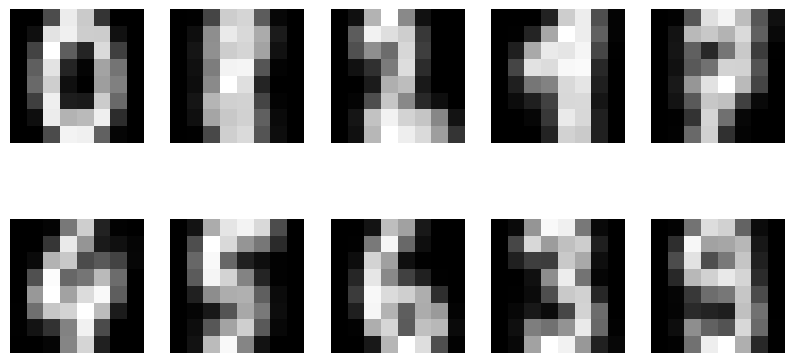

In [6]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, adjusted_rand_score, silhouette_score
import numpy as np


n_clusters = 10 # так как у нас 10 цифр

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(data)


# Метрики качества
labels = kmeans.labels_
homogeneity = homogeneity_score(digits.target, labels)
completeness = completeness_score(digits.target, labels)
adjusted_rand = adjusted_rand_score(digits.target, labels)
silhouette = silhouette_score(data, labels)

print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("Adjusted Rand Index:", adjusted_rand)
print("Silhouette Coefficient:", silhouette)

#Визуализация центроидов кластеров
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
centroids = kmeans.cluster_centers_.reshape(n_clusters, 8, 8)  # преобразуем для визуализации 8x8

for i, ax in enumerate(axes.flat):
    ax.imshow(centroids[i], cmap='gray')
    ax.axis('off')
plt.show()



Не всегда бывает удобно работать с полной матрицей объект-признак — например, для визуализации подходят лишь выборки размерности не больше трёх. На лекциях был рассмотрен метод уменьшения размерности *PCA*. В документации sklearn есть [сравнение](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#example-manifold-plot-lle-digits-py) различных способов понижения размерности для проекции на плоскость. На изображениях видно, что некоторые преобразования дают неплохую визуализацию, где одинаковые цифры расположены близко друг к другу. Посмотрим, поможет ли это на практике.
 
**2. (1 балл)** Примените преобразования [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) и [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (для числа компонент 2 и 10), проведите кластеризацию в новых признаковых пространствах и сравните результаты с предыдущими. Нашелся ли метод кластеризации, превосходящий другие по всем метрикам? Являются ли все три метрики согласованными? Можете ли вы объяснить, почему так произошло?

In [7]:
from sklearn.decomposition import PCA

# Уменьшение размерности до 2 компонент
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Кластеризация на данных после PCA
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(data_pca)



from sklearn.manifold import TSNE

# Уменьшение размерности до 2 компонент с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Кластеризация на данных после t-SNE
kmeans_tsne = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_tsne.fit(data_tsne)



# Вычисление метрик для PCA
labels_pca = kmeans_pca.labels_
homogeneity_pca = homogeneity_score(digits.target, labels_pca)
completeness_pca = completeness_score(digits.target, labels_pca)
adjusted_rand_pca = adjusted_rand_score(digits.target, labels_pca)
silhouette_pca = silhouette_score(data_pca, labels_pca)

# Вычисление метрик для t-SNE
labels_tsne = kmeans_tsne.labels_
homogeneity_tsne = homogeneity_score(digits.target, labels_tsne)
completeness_tsne = completeness_score(digits.target, labels_tsne)
adjusted_rand_tsne = adjusted_rand_score(digits.target, labels_tsne)
silhouette_tsne = silhouette_score(data_tsne, labels_tsne)

print("PCA - Homogeneity:", homogeneity_pca, "Completeness:", completeness_pca, "Adjusted Rand:", adjusted_rand_pca, "Silhouette:", silhouette_pca)
print("t-SNE - Homogeneity:", homogeneity_tsne, "Completeness:", completeness_tsne, "Adjusted Rand:", adjusted_rand_tsne, "Silhouette:", silhouette_tsne)

# Результаты метрик показывают, что t-SNE лучше отделяет кластеры (Silhouette: 0.640) по сравнению с PCA (Silhouette: 0.393), что обычно указывает на более явное разделение групп в пространстве. При этом гомогенность и полнота низкие для обоих методов, что говорит о нечетких границах кластеров.

PCA - Homogeneity: 0.008477983583449327 Completeness: 0.008545358396000038 Adjusted Rand: -0.0006026103721476799 Silhouette: 0.39336879564926347
t-SNE - Homogeneity: 0.009605146983261578 Completeness: 0.009621450243308918 Adjusted Rand: -9.803198520552504e-05 Silhouette: 0.6402026


**3. (1 балл)** Визуализируйте несколько изображений, которые во всех случаях были отнесены к неправильному кластеру (объект назовем ошибочно отнесенным, если он имеет иную метку класса, нежели большая часть объектов в кластере). Можете ли вы пояснить, почему так произошло?

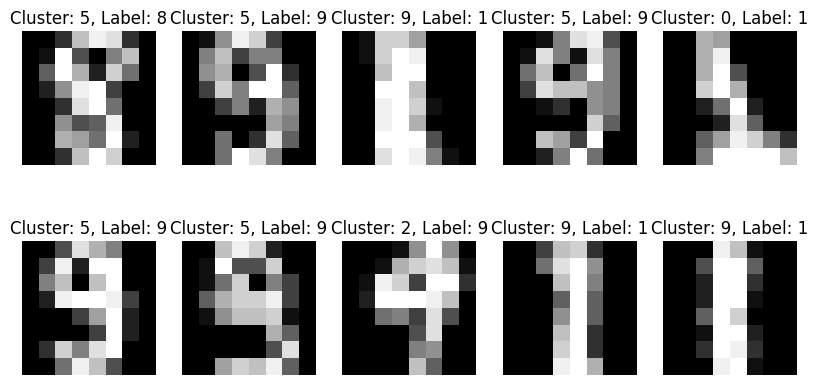

In [9]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import numpy as np

# Загрузим данные и проведем кластеризацию
data, labels = load_digits(return_X_y=True)
kmeans = KMeans(n_clusters=10, random_state=0, init='k-means++').fit(data)
clusters = kmeans.labels_

# labels - истинные метки классов
# clusters - кластеры, полученные после применения алгоритма кластеризации
incorrect_images = []

# Находим изображения, которые имеют иную метку класса, чем преобладающая в кластере
for cluster in np.unique(clusters):
    indices = np.where(clusters == cluster)[0]
    labels_in_cluster = labels[indices]
    most_common_label = Counter(labels_in_cluster).most_common(1)[0][0]
    
    # Находим индексы изображений с метками, отличными от преобладающей
    incorrect_indices = indices[labels_in_cluster != most_common_label]
    incorrect_images.extend(incorrect_indices)

# Отбираем несколько изображений для визуализации
num_images_to_display = min(10, len(incorrect_images))
selected_incorrect_images = np.random.choice(incorrect_images, num_images_to_display, replace=False)

# Визуализация
plt.figure(figsize=(10, 5))
for i, img_idx in enumerate(selected_incorrect_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(data[img_idx].reshape(8, 8), cmap='gray')
    plt.title(f"Cluster: {clusters[img_idx]}, Label: {labels[img_idx]}")
    plt.axis('off')
plt.show()


## Разделение изображения на семантические компоненты

![RedPanda](http://imgur.com/6Aa52Lm.png)

Алгоритмы кластеризации могут применяться в самых разных целях. Например, в анализе изображений есть задача разделения изображения на семантические компоненты, которую можно решать в том числе с помощью алгоритмов кластеризации. 

Загрузите [изображения](https://disk.yandex.ru/d/Nsl0cWOsc9PO-g).

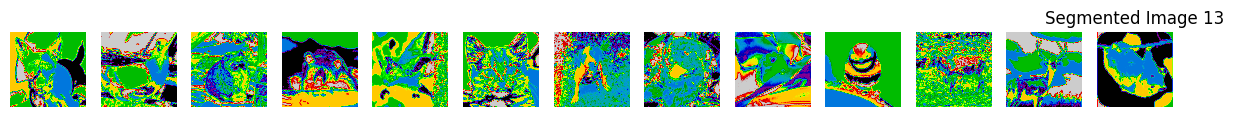

In [12]:
from skimage.io import imread
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Путь к папке с изображениями
images_path = 'images'  # Замените на ваш путь к папке с изображениями
images = [imread(os.path.join(images_path, img)) for img in os.listdir(images_path)]

# Функция сегментации изображения с использованием KMeans
def segment_image(image, n_clusters=5, lambda_param=1):
    h, w, _ = image.shape
    # Преобразование изображения в вектор признаков с координатами и цветом
    X = np.array([[lambda_param * i / h, lambda_param * j / w] + image[i, j].tolist() for i in range(h) for j in range(w)])
    
    # Применение KMeans для кластеризации пикселей
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    segmented_image = labels.reshape(h, w)
    
    return segmented_image

# Сегментация и визуализация для всех изображений
segmented_images = [segment_image(img, n_clusters=5, lambda_param=1) for img in images]

# Визуализация сегментированных изображений
plt.figure(figsize=(15, 15))
for i, segmented in enumerate(segmented_images):
    plt.subplot(1, len(segmented_images), i + 1)
    plt.imshow(segmented, cmap='nipy_spectral')  # Используем 'nipy_spectral' для лучшей наглядности
    plt.axis('off')
plt.title(f"Segmented Image {i+1}")
plt.show()


**4. (1 балл)** Для каждого изображения, используя кластеризацию KMeans, выделите компоненты, охарактеризовав каждый пиксель вектором признаков $\psi_i = [\lambda x_i, \lambda y_i, r_i, g_i, b_i]$, где 
$x_i$ и $y_i$ — координаты пикселя, $r_i, g_i, b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.

In [14]:
# тут плохо
from sklearn.metrics import silhouette_score

def segment_and_evaluate_image(image, n_clusters=5, lambda_param=1):
    h, w, _ = image.shape
    # Преобразование изображения в вектор признаков
    X = np.array([[lambda_param * i / h, lambda_param * j / w] + image[i, j].tolist() for i in range(h) for j in range(w)])
    
    # Кластеризация
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    segmented_image = labels.reshape(h, w)
    
    # Оценка качества с помощью коэффициента силуэта
    score = silhouette_score(X, labels)
    return segmented_image, score

# Сегментация и оценка для всех изображений
segmented_images_scores = [segment_and_evaluate_image(img, n_clusters=5, lambda_param=1) for img in images]

# Визуализация и вывод оценки
plt.figure(figsize=(15, 15))
for i, (segmented, score) in enumerate(segmented_images_scores):
    plt.subplot(1, len(segmented_images_scores), i + 1)
    plt.imshow(segmented, cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f"Image {i+1} \nSilhouette Score: {score:.2f}")
plt.show()


KeyboardInterrupt: 

**5. (1 балл)** Попробуйте выделить сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету. При необходимости можно сжать изображения в 2 раза.

In [ ]:
from sklearn.cluster import SpectralClustering
from skimage.color import rgb2lab
from skimage.transform import resize

# Применение Spectral Clustering для сегментации
def segment_image_spectral(image, n_clusters=5, resize_factor=0.5):
    # Изменение размера изображения для ускорения обработки
    small_image = resize(image, (int(image.shape[0] * resize_factor), int(image.shape[1] * resize_factor)),
                         anti_aliasing=True)
    
    h, w, _ = small_image.shape
    lab_image = rgb2lab(small_image)  # Преобразование в LAB пространство
    X = np.array([[i / h, j / w] + lab_image[i, j].tolist() for i in range(h) for j in range(w)])
    
    # Применение Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
    labels = spectral.fit_predict(X)
    segmented_image = labels.reshape(h, w)
    
    # Возвращаем изображение к исходному размеру
    segmented_image = resize(segmented_image, (image.shape[0], image.shape[1]), order=0, preserve_range=True).astype(int)
    return segmented_image

# Применение к изображениям
segmented_images_spectral = [segment_image_spectral(img, n_clusters=5, resize_factor=0.5) for img in images]

# Визуализация результатов сегментации
plt.figure(figsize=(15, 15))
for i, segmented in enumerate(segmented_images_spectral):
    plt.subplot(1, len(segmented_images_spectral), i + 1)
    plt.imshow(segmented, cmap='nipy_spectral')
    plt.axis('off')
plt.show()


C:\Users\vital\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


**6. (1 балл)** Визуализируйте результаты сегментации (аналогично рисунку выше) для обоих методов. [Пример кода для визуализации](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html).

**7. (1 балл)** Поэкспериментируйте с параметрами алгоритмов и параметром $\lambda$ в признаках. Сравните два подхода и сегментации, к которым они приводят.
Для всех ли изображений в результате сегментации хорошо видны контуры объектов?

Измерять качество сегментации в этом пункте не нужно, в результате ожидаются только картинки и выводы.

### Рекомендации к выполнению
Для работы с изображениями удобно использовать библиотеку [Scikit-Image](http://scikit-image.org). 
Установите [PIL](http://www.pythonware.com/products/pil/) для возможности чтения формата JPG.

Пример чтения изображения в матрицу [картинки](https://images.wallpapersden.com/image/download/4k-planet-pixel-art_bGprbGqUmZqaraWkpJRqZmetamZn.jpg):

    import matplotlib.pyplot as plt
    from skimage.io import imread

    I = imread("wallpapersden.com_k-planet-pixel-art_512x512.jpg") 

    plt.figure(figsize=(15, 5))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(I[:,:,i])

## Word2vec

**8. (3 балла)**
1. [Скачайте данные](https://www.kaggle.com/c/word2vec-nlp-tutorial/data). Если не получается, можно скачать и работать с [этими данными](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).
2. [Установите необходимые библиотеки](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/setting-up-your-system)
3. Внимательно изучите тьториалы, доступные в рамках контеста [Part 1](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words) – [Part 4](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-4-comparing-deep-and-non-deep-learning-methods). Эти статьи очень полезны для понимания принципов анализа текстовых данных в питоне.
4. Согласно тьюториалам подготовить данные и обучить модель word2vec. Полезно засечь время обучения модели.
5. Протестировать модель на датасете, подготовленном Google, с задачами вида: *London → England*, значит, *Berlin → Germany*. Пример вызова нужной функции и описание датасета есть [тьюториале по word2vec](https://rare-technologies.com/word2vec-tutorial/). Сам датасет можно скачать по [ссылке](https://www.dropbox.com/s/prb8n5b5na5qo07/questions-words.txt?dl=0). С чем может быть связано большое число неверных ответов?
6. Привести по 5-10 примеров для задачи поиска лишнего слова *(model.doesnt_match)* и для задачи поиска семантически близких слов *(model.most_similar)*. Проинтерпретировать полученные результаты. Все ли примеры соответствуют здравому смыслу? По каким принципам группируются близкие слова в выбранных вами примерах?

In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('path_to_imdb_dataset.csv')  # Замените на путь к датасету

# Обработка данных (например, токенизация и предобработка)
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Токенизация
tokenized_reviews = [word_tokenize(review.lower()) for review in data['review']]

# Обучение модели
model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)
